In [1]:
import numpy as np
import pandas as pd
import json


In [2]:
df = pd.read_json('info.txt')
data=df['data']['stations']
df_station_info = pd.DataFrame.from_dict(data, orient='columns')

In [3]:
df_station_info.head()


,address,lat,lon,name,region_id,rental_methods,station_id
0,"20 King Street East, Hamilton",43.256317,-79.868664,Gore Park - 74,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_435
1,"200 James Street North, Hamilton",43.261819,-79.866743,James North at Mulberry - 76,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_436
2,"126 Catharine Street North, Hamilton",43.259111,-79.863613,Seedworks - 81B,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_527
3,"4 Cootes Drive, Hamilton",43.265679,-79.950420,Cootes at York and King,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_530
4,"89-101 Osler Drive, Hamilton",43.259550,-79.942643,Osler at Grant - 6,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_535


In [4]:
dg = pd.read_json('status.txt')
data=dg['data']['stations']
dg_station_status = pd.DataFrame.from_dict(data, orient='columns')
dg_station_status.last_reported = pd.to_datetime(dg_station_status.last_reported, unit='s')
dg_station_status.head()

,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,station_id
0,1,1,1,2017-10-02 03:59:58,3,0,11,hub_435
1,1,1,1,2017-10-02 03:59:58,3,0,16,hub_436
2,1,1,1,2017-10-02 03:59:58,0,0,14,hub_527
3,1,1,1,2017-10-02 03:59:58,4,0,7,hub_530
4,1,1,1,2017-10-02 03:59:58,2,0,8,hub_535


In [5]:
import os

current_path = os.path.abspath('./data')

folder_names = os.listdir(current_path)
current_path
folder_names 

data_folders = [os.path.join(current_path, folder_name) for folder_name in folder_names]

data_folders
# # matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# # [[el - 1 for el in row] for row in matrix]

data_files_paths = [os.path.join(folder_path, file_name)for folder_path in data_folders for file_name in os.listdir(folder_path)] 

data_files_paths = sorted(data_files_paths)

data_files_paths[0:2]


# #x[0] for x in data_files_paths]

['/home/mahsarm/Desktop/ML-projects/SoBi/data/02-10-17/status-00-00.txt',
 '/home/mahsarm/Desktop/ML-projects/SoBi/data/02-10-17/status-00-15.txt']

In [6]:
data_files = data_files_paths
df_list = []
for data_file in data_files:
    dg = pd.read_json(data_file)
    data_js = dg['data']['stations']
    dg_station_status = pd.DataFrame.from_dict(data_js, orient='columns')
    dg_station_status.last_reported = dg_station_status.last_reported.mean().astype(int)
    dg_station_status.last_reported = pd.to_datetime(dg_station_status.last_reported, unit='s')
    dg_station_status = dg_station_status.set_index(['station_id','last_reported'], drop= False)
    dg_station_status = dg_station_status.tz_localize('UTC', level=1)
    dg_station_status = dg_station_status.tz_convert(tz='America/Toronto', level=1)
    
    df_list.append(dg_station_status)
df_list


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [7]:
dfff = pd.concat(df_list)
bikes = dfff.sort_index()

bikes

is_installed  is_renting  is_returning  \
station_id last_reported                                                       
hub_1042   2017-10-01 23:59:58-04:00             1           1             1   
           2017-10-02 00:15:02-04:00             1           1             1   
           2017-10-02 00:30:02-04:00             1           1             1   
           2017-10-02 00:45:00-04:00             1           1             1   
           2017-10-02 01:00:03-04:00             1           1             1   
           2017-10-02 01:14:40-04:00             1           1             1   
           2017-10-02 01:29:50-04:00             1           1             1   
           2017-10-02 01:45:00-04:00             1           1             1   
           2017-10-02 02:00:03-04:00             1           1             1   
           2017-10-02 02:15:03-04:00             1           1             1   
           2017-10-02 02:30:03-04:00             1           1             1   
           2017-10-02 02:45:03-04:00             1           1             1   
           2017-10-02 03:00:03-04:00             1           1             1   
           2017-10-02 03:15:00-04:00             1           1             1   
           2017-10-02 03:30:03-04:00             1           1             1   
           2017-10-02 03:45:03-04:00             1           1             1   
           2017-10-02 04:00:00-04:00             1           1             1   
           2017-10-02 04:15:00-04:00             1           1             1   
           2017-10-02 04:30:03-04:00             1           1             1   
           2017-10-02 04:44:41-04:00             1           1             1   
           2017-10-02 04:59:50-04:00             1           1             1   
           2017-10-02 05:14:41-04:00             1           1             1   
           2017-10-02 05:29:24-04:00             1           1             1   
           2017-10-02 05:44:21-04:00             1           1             1   
           2017-10-02 05:59:21-04:00             1           1             1   
           2017-10-02 06:14:12-04:00             1           1             1   
           2017-10-02 06:29:11-04:00             1           1             1   
           2017-10-02 06:44:21-04:00             1           1             1   
           2017-10-02 06:59:24-04:00             1           1             1   
           2017-10-02 07:14:24-04:00             1           1             1   
...                                            ...         ...           ...   
hub_960    2017-10-08 16:30:02-04:00             1           1             1   
           2017-10-08 16:45:00-04:00             1           1             1   
           2017-10-08 17:00:00-04:00             1           1             1   
           2017-10-08 17:15:05-04:00             1           1             1   
           2017-10-08 17:30:05-04:00             1           1             1   
           2017-10-08 17:44:06-04:00             1           1             1   
           2017-10-08 17:59:16-04:00             1           1             1   
           2017-10-08 18:14:06-04:00             1           1             1   
           2017-10-08 18:29:16-04:00             1           1             1   
           2017-10-08 18:44:26-04:00             1           1             1   
           2017-10-08 18:59:23-04:00             1           1             1   
           2017-10-08 19:14:26-04:00             1           1             1   
           2017-10-08 19:29:36-04:00             1           1             1   
           2017-10-08 19:44:36-04:00             1           1             1   
           2017-10-08 19:59:46-04:00             1           1             1   
           2017-10-08 20:14:28-04:00             1           1             1   
           2017-10-08 20:29:36-04:00             1           1             1   
           2017-10-08 20:44:46-04:00  

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

#bikes.plot(x=xcol, y='Sales', ax=ax, alpha=0.5, color='r')

In [9]:
available_bikes = bikes.groupby(['last_reported'])['num_bikes_available'].sum()
available_bikes.head()

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'last_reported' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


last_reported
2017-10-02 03:59:58    472
2017-10-02 04:15:02    471
2017-10-02 04:30:02    471
2017-10-02 04:45:00    466
2017-10-02 05:00:03    465
Name: num_bikes_available, dtype: int64

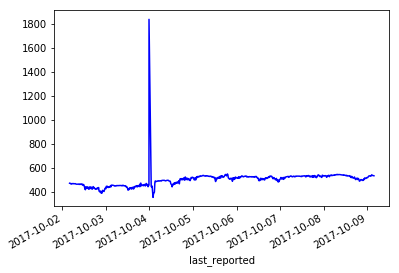

In [10]:
available_bikes.plot(x='last_reported', y='num_bikes_available',color='b')

In [11]:
available_bikes.ix['2017-10-03 19:00:00':'2017-10-04 21:00:00']

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


last_reported
2017-10-03 19:14:56     473
2017-10-03 19:30:04     455
2017-10-03 19:44:46     450
2017-10-03 19:59:56     459
2017-10-03 20:15:04     456
2017-10-03 20:30:04     455
2017-10-03 20:45:03     451
2017-10-03 20:59:46     458
2017-10-03 21:14:46     462
2017-10-03 21:29:44     454
2017-10-03 21:44:53     449
2017-10-03 22:00:02     456
2017-10-03 22:14:54     470
2017-10-03 22:30:03     460
2017-10-03 22:44:54     456
2017-10-03 23:00:04     462
2017-10-03 23:15:03     443
2017-10-03 23:29:56     451
2017-10-03 23:45:01     457
2017-10-03 23:46:37    1836
2017-10-04 00:59:27     444
2017-10-04 01:14:36     441
2017-10-04 01:29:37     448
2017-10-04 01:44:37     395
2017-10-04 01:59:47     354
2017-10-04 02:14:47     383
2017-10-04 02:29:54     391
2017-10-04 02:45:03     398
2017-10-04 03:00:03     476
2017-10-04 03:15:03     491
                       ... 
2017-10-04 13:45:03     476
2017-10-04 13:59:56     463
2017-10-04 14:14:55     470
2017-10-04 14:29:56     474
2017-1

In [12]:
bikes = bikes[~bikes.index.duplicated(keep='first')]

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'last_reported' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


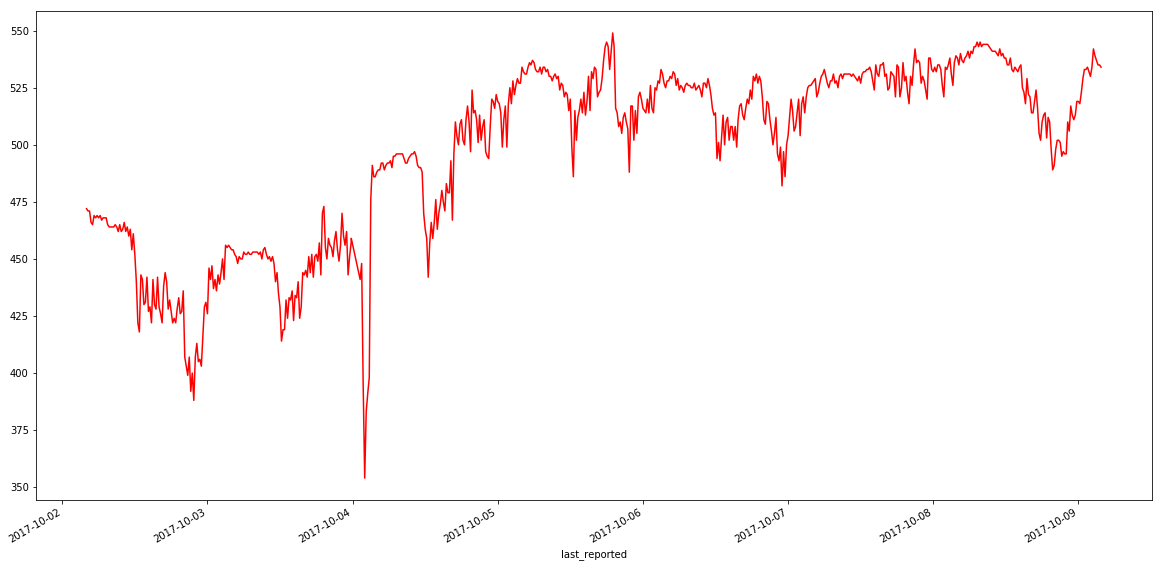

In [13]:
available_bikes = bikes.groupby(['last_reported'])['num_bikes_available'].sum()

available_bikes.plot(figsize=(20,10),x='last_reported', y='num_bikes_available',color='r')


/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


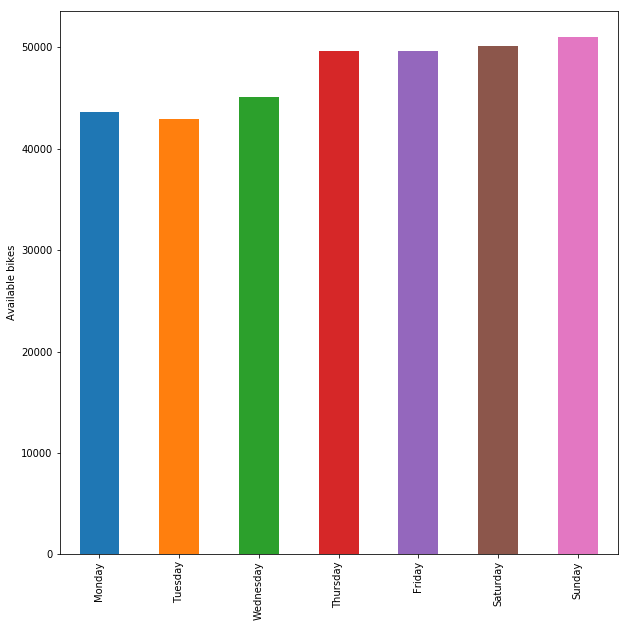

In [14]:
#bikes['day'] = bikes['last_reported'].dt.day
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot1 = bikes.groupby(bikes['last_reported'].dt.weekday.astype('category',ordered=True).cat.rename_categories(cats))['num_bikes_available'].sum().plot(kind='bar',
    figsize=(10,10))
plot1.set_xlabel("")
plot1.set_ylabel("Available bikes")

In [15]:
station_activities = bikes[['num_bikes_available']].groupby('station_id').diff()

In [16]:
station_activities = station_activities.fillna(0)
station_activities = station_activities.reset_index()
station_activities.head()

,station_id,last_reported,num_bikes_available
0,hub_1042,2017-10-01 23:59:58-04:00,0.0
1,hub_1042,2017-10-02 00:15:02-04:00,0.0
2,hub_1042,2017-10-02 00:30:02-04:00,0.0
3,hub_1042,2017-10-02 00:45:00-04:00,0.0
4,hub_1042,2017-10-02 01:00:03-04:00,0.0


In [17]:
df_station_info.head()

,address,lat,lon,name,region_id,rental_methods,station_id
0,"20 King Street East, Hamilton",43.256317,-79.868664,Gore Park - 74,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_435
1,"200 James Street North, Hamilton",43.261819,-79.866743,James North at Mulberry - 76,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_436
2,"126 Catharine Street North, Hamilton",43.259111,-79.863613,Seedworks - 81B,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_527
3,"4 Cootes Drive, Hamilton",43.265679,-79.950420,Cootes at York and King,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_530
4,"89-101 Osler Drive, Hamilton",43.259550,-79.942643,Osler at Grant - 6,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",hub_535


In [18]:
df_station_info.set_index('station_id', inplace=True)

In [19]:

station_activities['num_bikes_available'] = station_activities['num_bikes_available'].abs()
df_station_info['activity_total'] = station_activities.groupby(['station_id'])['num_bikes_available'].sum()
df_station_info.head()


,address,lat,lon,name,region_id,rental_methods,activity_total
station_id,,,,,,,
hub_435,"20 King Street East, Hamilton",43.256317,-79.868664,Gore Park - 74,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",315.0
hub_436,"200 James Street North, Hamilton",43.261819,-79.866743,James North at Mulberry - 76,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",240.0
hub_527,"126 Catharine Street North, Hamilton",43.259111,-79.863613,Seedworks - 81B,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",177.0
hub_530,"4 Cootes Drive, Hamilton",43.265679,-79.950420,Cootes at York and King,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",82.0
hub_535,"89-101 Osler Drive, Hamilton",43.259550,-79.942643,Osler at Grant - 6,region_86,"[KEY, APPLEPAY, ANDROIDPAY, TRANSITCARD, ACCOU...",64.0


In [20]:
total_bikes = bikes.groupby(['station_id']).apply(lambda x:x.iloc[0]['num_bikes_available']+x.iloc[0]['num_docks_available'])
total_bikes.head()

/home/mahsarm/Desktop/ML-projects/kaggle1/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'station_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


station_id
hub_1042     8
hub_1063     4
hub_1252     6
hub_1253    10
hub_1287    10
dtype: int64

In [24]:
import os
from bokeh.io import show, output_notebook
from bokeh.models import (
                         GMapPlot, GMapOptions, ColumnDataSource, Circle, Range1d, PanTool,
                         WheelZoomTool, BoxSelectTool)
from bokeh.plotting import ColumnDataSource


In [22]:
output_notebook()

Loading BokehJS ...

In [23]:


map_options = GMapOptions(lat= 43.25, lng=-79.89, map_type= 'roadmap', zoom =13)
plot = GMapPlot(x_range=Range1d(), y_range=Range1d(), map_options=map_options)
plot.title.text = "Hamilton Bike Share"
plot.api_key = os.environ["GOOGLE__APIKEY"] 

df_station_info['Scaled_total_activity'] = df_station_info['activity_total']/30

df_station_info ['station_docks'] = total_bikes /2

stations_data = ColumnDataSource(
    data = df_station_info
)


circle_activities = Circle(x="lon", y="lat", size = 'Scaled_total_activity', fill_color="blue", fill_alpha=0.8, line_color=None)
circle_docks = Circle(x="lon", y="lat", size = 'station_docks', fill_color="red", fill_alpha=0.8, line_color=None)
plot.add_glyph(stations_data, circle_activities)
plot.add_glyph(stations_data, circle_docks)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
plot.width=900
show(plot)